In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [9]:
# activation function (wx+b)
w=torch.Tensor(torch.rand(2,2))
x=torch.Tensor(torch.rand(2,2))
b=torch.tensor(torch.rand(1,2))
y=w*x+b
print(y)

tensor([[0.8039, 0.5591],
        [0.2261, 0.3400]])


/tmp/ipython-input-1318289973.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b=torch.tensor(torch.rand(1,2))


In [10]:
weight=0.7
bias=0.3
start=0
end=1
step=0.009
X=torch.arange(start,end,step).unsqueeze(dim=1)
print(X.shape)
y=weight*X + bias
X[:10],y[:10]

torch.Size([112, 1])


(tensor([[0.0000],
         [0.0090],
         [0.0180],
         [0.0270],
         [0.0360],
         [0.0450],
         [0.0540],
         [0.0630],
         [0.0720],
         [0.0810]]),
 tensor([[0.3000],
         [0.3063],
         [0.3126],
         [0.3189],
         [0.3252],
         [0.3315],
         [0.3378],
         [0.3441],
         [0.3504],
         [0.3567]]))

In [11]:
# time to split into training and testing data
# training data= input and outpur
#testing data = input and output
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]


In [12]:
def plot_predictions(train_data,test_data,train_labels,test_labels,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="r",s=4 , label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=8, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="b", s=4, label="Predictions")
  plt.legend(prop={"size":10})


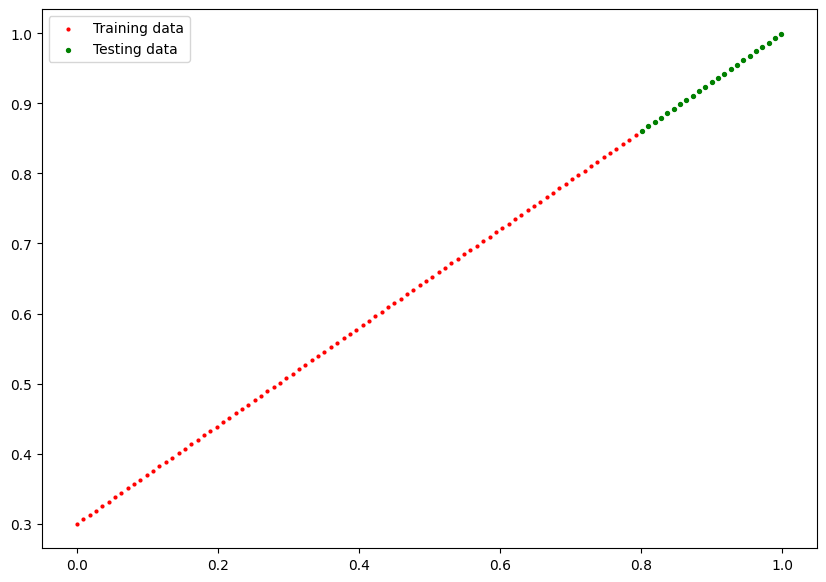

In [13]:
plot_predictions(X_train,X_test,y_train,y_test)

In [14]:
# building a model
#model > something that can take my input data and do some analysis on it and
# after that somehow can replicate my output with some accuracy atleast
# steps take input data
# steps do analysis >
# steps replicate after some iteraions forward backward
# it has got much more lets see

In [15]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          dtype=torch.float) ,
                            requires_grad=True)
    self.bias=nn.Parameter(torch.randn(1,
                                       dtype=torch.float32),
                           requires_grad=True)
  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.weights*x + self.bias



In [16]:
# in the documentation of parameter parameters was said to be an iterable that contains
# all the params of the object ig
# those parameters are also states
# torch.manual_seed(42) > very useful stuff for reproducability
model_0=LinearRegressionModel()
list(model_0.parameters())
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([-1.7360], requires_grad=True), Parameter containing:
tensor([-0.2851], requires_grad=True)]
OrderedDict({'weights': tensor([-1.7360]), 'bias': tensor([-0.2851])})


In [17]:
with torch.inference_mode():
  y_preds=model_0(X_test)
print(y_preds)

tensor([[-1.6757],
        [-1.6913],
        [-1.7069],
        [-1.7226],
        [-1.7382],
        [-1.7538],
        [-1.7694],
        [-1.7850],
        [-1.8007],
        [-1.8163],
        [-1.8319],
        [-1.8475],
        [-1.8632],
        [-1.8788],
        [-1.8944],
        [-1.9100],
        [-1.9257],
        [-1.9413],
        [-1.9569],
        [-1.9725],
        [-1.9882],
        [-2.0038],
        [-2.0194]])


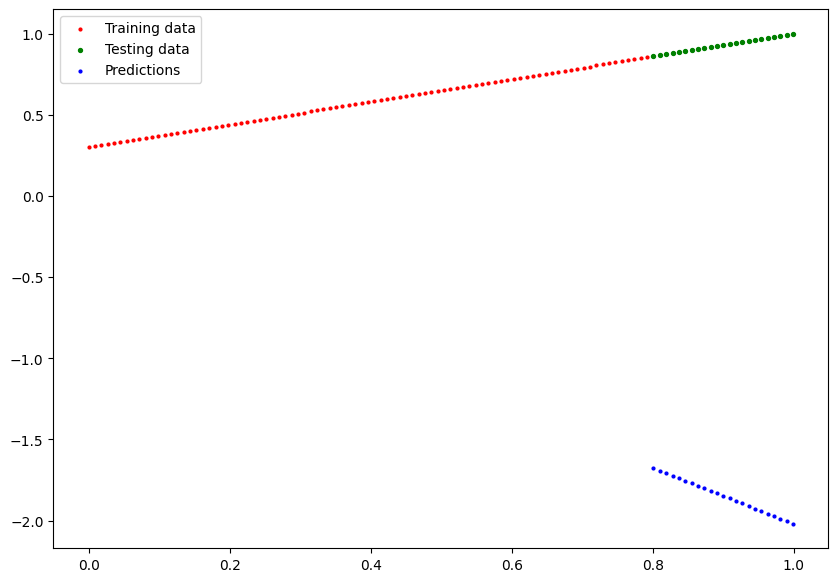

In [18]:
plot_predictions(X_train,X_test,y_train,y_test,y_preds)

In [41]:
import torch.optim as optim
# ok we did make predictions but there is no adjustment the machine is not learning anything
# so now we gotta introduce things like loss_factor and optimizer to get close to
# the real data may be we be using gradient descent also to find the best params

# loss_func=nn.L1Loss()
loss_func=nn.MSELoss()
# loss_func=nn.MSELoss()
optimizer= optim.SGD(params=model_0.parameters(),lr=0.001)

In [42]:
epochs = 10000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # ---- Training ----
    model_0.train()

    y_pred = model_0(X_train)
    loss = loss_func(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ---- Testing ----
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_func(test_pred, y_test.float())

    # ---- Logging ----
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().cpu().item())
        test_loss_values.append(test_loss.detach().cpu().item())

        print(
            f"Epoch: {epoch} | "
            f"Train Loss: {loss.item():.4f} | "
            f"Test Loss: {test_loss.item():.4f}"
        )


Epoch: 0 | Train Loss: 0.0064 | Test Loss: 0.0271
Epoch: 10 | Train Loss: 0.0064 | Test Loss: 0.0271
Epoch: 20 | Train Loss: 0.0063 | Test Loss: 0.0271
Epoch: 30 | Train Loss: 0.0063 | Test Loss: 0.0271
Epoch: 40 | Train Loss: 0.0063 | Test Loss: 0.0270
Epoch: 50 | Train Loss: 0.0063 | Test Loss: 0.0270
Epoch: 60 | Train Loss: 0.0063 | Test Loss: 0.0270
Epoch: 70 | Train Loss: 0.0063 | Test Loss: 0.0269
Epoch: 80 | Train Loss: 0.0063 | Test Loss: 0.0269
Epoch: 90 | Train Loss: 0.0063 | Test Loss: 0.0269
Epoch: 100 | Train Loss: 0.0062 | Test Loss: 0.0268
Epoch: 110 | Train Loss: 0.0062 | Test Loss: 0.0268
Epoch: 120 | Train Loss: 0.0062 | Test Loss: 0.0268
Epoch: 130 | Train Loss: 0.0062 | Test Loss: 0.0268
Epoch: 140 | Train Loss: 0.0062 | Test Loss: 0.0267
Epoch: 150 | Train Loss: 0.0062 | Test Loss: 0.0267
Epoch: 160 | Train Loss: 0.0062 | Test Loss: 0.0267
Epoch: 170 | Train Loss: 0.0062 | Test Loss: 0.0266
Epoch: 180 | Train Loss: 0.0062 | Test Loss: 0.0266
Epoch: 190 | Train Loss

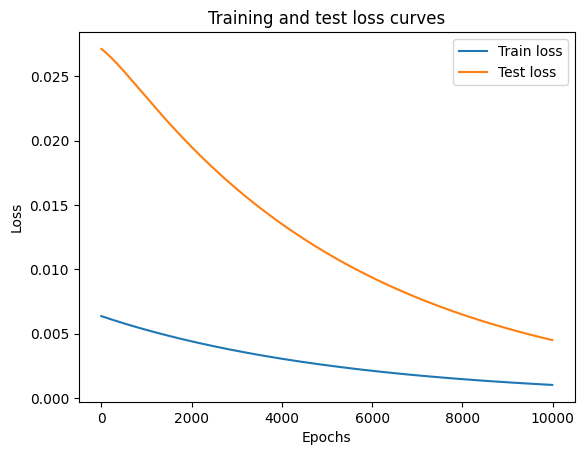

In [43]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [44]:
print(train_loss_values)
print()

[0.0063643669709563255, 0.0063523645512759686, 0.0063403998501598835, 0.006328472401946783, 0.006316578947007656, 0.0063047208823263645, 0.006292897742241621, 0.006281103938817978, 0.006269347853958607, 0.006257619243115187, 0.006245927419513464, 0.006234262138605118, 0.0062226299196481705, 0.006211027503013611, 0.006199453491717577, 0.006187910214066505, 0.0061763981357216835, 0.00616490887477994, 0.0061534494161605835, 0.00614201882854104, 0.006130617577582598, 0.006119243800640106, 0.006107893772423267, 0.006096566095948219, 0.00608526635915041, 0.006073992699384689, 0.0060627455823123455, 0.006051522213965654, 0.006040323991328478, 0.006029150448739529, 0.0060180011205375195, 0.006006875541061163, 0.005995776038616896, 0.0059847040101885796, 0.005973656661808491, 0.0059626298025250435, 0.005951626226305962, 0.005940642207860947, 0.005929681472480297, 0.005918749142438173, 0.005907836835831404, 0.00589694594964385, 0.005886075086891651, 0.005875231232494116, 0.005864407867193222, 0.

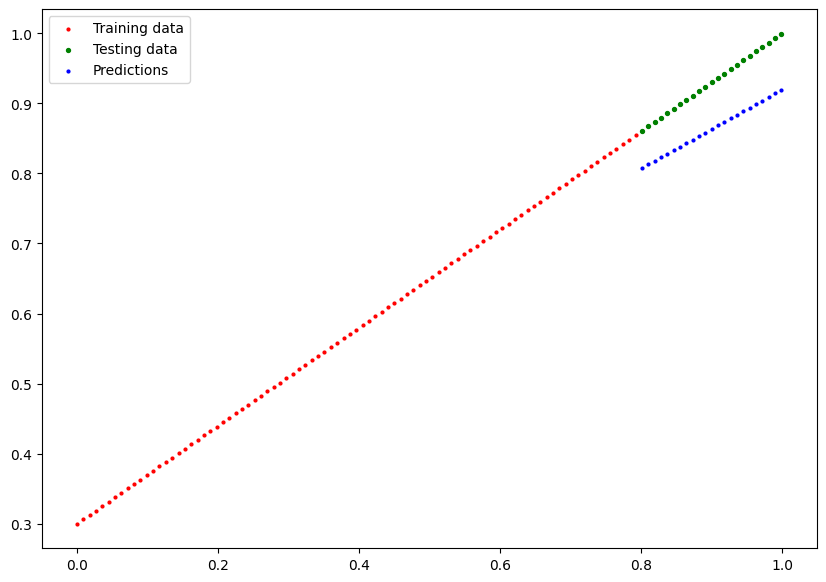

In [45]:
plot_predictions(X_train,X_test,y_train,y_test,test_pred)

In [46]:
!pip install torchviz


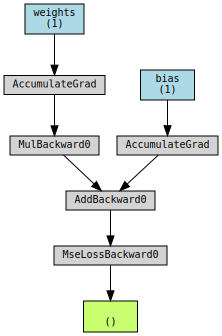

In [47]:
from torchviz import make_dot

y_pred = model_0(X_train)
loss = loss_func(y_pred, y_train)

dot = make_dot(loss, params=dict(model_0.named_parameters()))
dot


In [48]:
from pathlib import Path
#first we gonna create a directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# creating a model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
#Save the moel state dict
print(f"saving model to : {MODEL_SAVE_PATH}") # only saving the state_dict() only saves the models learned parameters
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to : models/01_pytorch_workflow_model_0.pth


In [49]:
loaded_model_0=LinearRegressionModel()
# Load the state_dict of our saved model
# this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [50]:
# now its time to test our model that is loaded
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
y_preds==loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

```  till now the model was not machine agnostic its time to make a machine agnostic code ```

In [51]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.9.0+cpu'

In [52]:
# time to setup device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device} ")

using device : cpu 


In [53]:
weight=0.7
bais=0.3
start,end=0,1
step=0.009
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bais
X[:10],y[0:10]

(tensor([[0.0000],
         [0.0090],
         [0.0180],
         [0.0270],
         [0.0360],
         [0.0450],
         [0.0540],
         [0.0630],
         [0.0720],
         [0.0810]]),
 tensor([[0.3000],
         [0.3063],
         [0.3126],
         [0.3189],
         [0.3252],
         [0.3315],
         [0.3378],
         [0.3441],
         [0.3504],
         [0.3567]]))

In [54]:
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split],y[:train_split]
X_test,y_test =X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(89, 89, 23, 23)

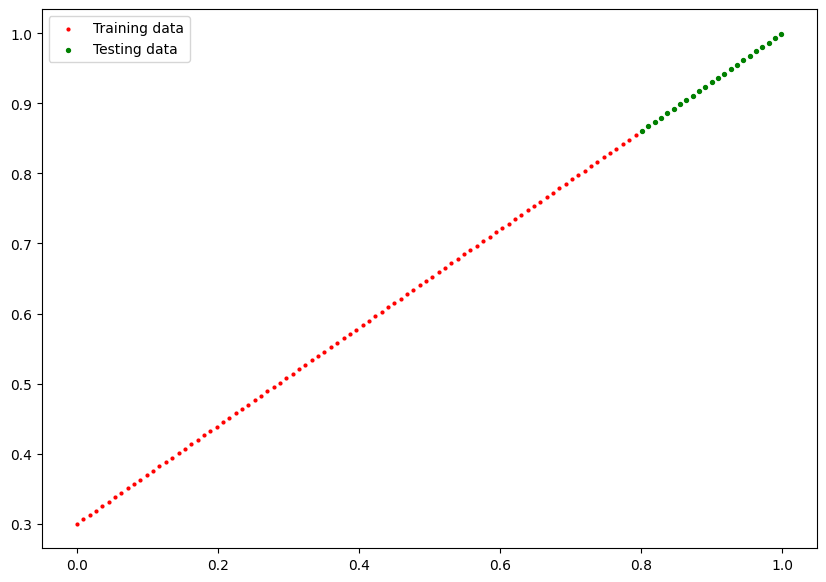

In [55]:
plot_predictions(X_train,X_test,y_train,y_test)

In [57]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)
  def forward(self,x:torch.Tensor)->  torch.Tensor:
    return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

``` lets put out model on gpu if its available ```

In [58]:
next(model_1.parameters()).device
model_1.to(device) # we did declare above the device type
next(model_1.parameters()).device

device(type='cpu')

In [69]:
loss_fun=nn.MSELoss()
optimizer= torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.001)

In [65]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fun(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fun(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 7.663049359507568e-07 | Test loss: 5.582137418969069e-07
Epoch: 10 | Train loss: 7.321357884393365e-07 | Test loss: 5.242134193395032e-07
Epoch: 20 | Train loss: 6.994648060754116e-07 | Test loss: 4.918167064715817e-07
Epoch: 30 | Train loss: 6.683177389277262e-07 | Test loss: 4.6138626430547447e-07
Epoch: 40 | Train loss: 6.386509880940139e-07 | Test loss: 4.327157228090073e-07
Epoch: 50 | Train loss: 6.103181249272893e-07 | Test loss: 4.054577686929406e-07
Epoch: 60 | Train loss: 5.831471412420797e-07 | Test loss: 3.794993688188697e-07
Epoch: 70 | Train loss: 5.573047587859037e-07 | Test loss: 3.5520338315109257e-07
Epoch: 80 | Train loss: 5.32704973466025e-07 | Test loss: 3.3232990404030716e-07
Epoch: 90 | Train loss: 5.091404204904393e-07 | Test loss: 3.1060034189067665e-07
Epoch: 100 | Train loss: 4.865792675445846e-07 | Test loss: 2.899445519233268e-07
Epoch: 110 | Train loss: 4.6504834472216316e-07 | Test loss: 2.705176029849099e-07
Epoch: 120 | Train loss

In [66]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6995]])),
             ('linear_layer.bias', tensor([0.3003]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [67]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8606],
        [0.8669],
        [0.8732],
        [0.8795],
        [0.8858],
        [0.8921],
        [0.8984],
        [0.9047],
        [0.9110],
        [0.9173],
        [0.9236],
        [0.9299],
        [0.9361],
        [0.9424],
        [0.9487],
        [0.9550],
        [0.9613],
        [0.9676],
        [0.9739],
        [0.9802],
        [0.9865],
        [0.9928],
        [0.9991]])

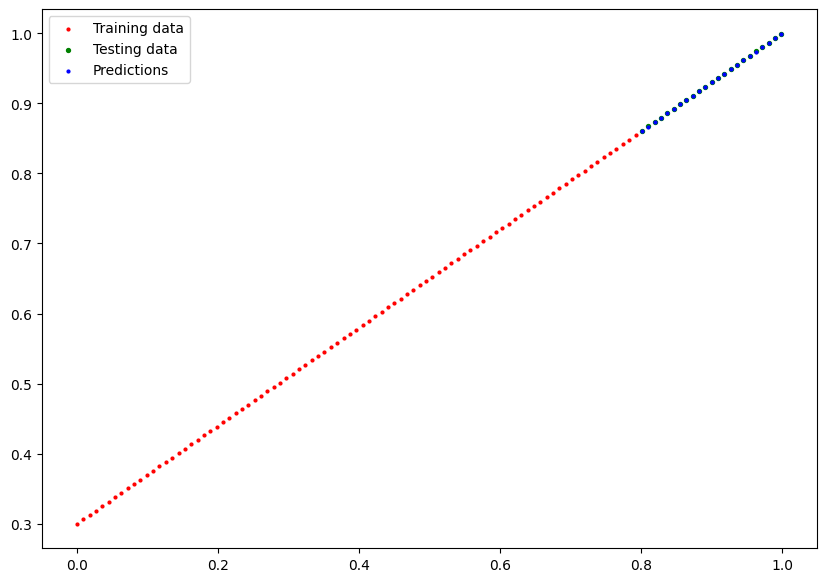

In [68]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
# plot_predictions(predictions=y_preds.cpu())
plot_predictions(X_train,X_test,y_train,y_test,y_preds)
